In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt

In [33]:
data_original = pd.read_csv("train.csv")

In [34]:
data_df = data_original.iloc[:,1:]

In [35]:
data_df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


# Encoding

In [36]:
data_encoded = data_df.copy()
LE = LabelEncoder()
LE.fit(data_df.target.unique()) #fit the classes names
data_encoded.target = LE.transform(data_df.target)

Before the next step (normalization) I have to separate the labels column from the features

In [37]:
X = data_encoded.iloc[:,0:len(data_encoded.columns)-1]
X = X.astype(float)
Y = data_encoded.iloc[:,len(data_encoded.columns)-1]

# Normalization

In [29]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.402093,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,-0.293664,-0.291038,-0.243606,...,-0.061446,0.246100,-0.420870,-0.249802,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
1,-0.253508,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,0.149647,-0.291038,-0.243606,...,-0.061446,-0.280099,-0.420870,-0.249802,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
2,-0.253508,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,0.149647,-0.291038,-0.243606,...,-0.061446,-0.280099,-0.420870,-0.249802,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
3,0.402093,-0.210106,-0.307165,0.079240,13.508710,4.524667,4.665884,-0.293664,-0.291038,0.679472,...,19.044887,-0.280099,-0.047949,1.019683,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
4,-0.253508,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,-0.293664,-0.291038,-0.243606,...,-0.061446,0.246100,-0.420870,-0.249802,-0.413584,-0.299712,0.040798,-0.129516,-0.386938,-0.104963


# Understanding the dataset better

I'll attempt to, first, know the distripution of the data over the classes to see if there is a reasonable balance.

<BarContainer object of 9 artists>

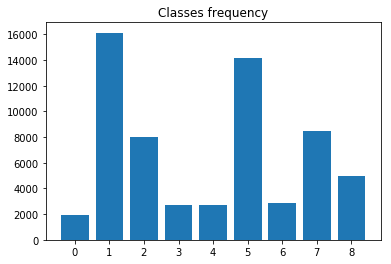

In [51]:
from collections import Counter
plt.xticks(range(9))
plt.title("Classes frequency")
plt.bar(range(9),dict(Counter(Y)).values())

The graph shows that the data is not balanced, which might cause a bias in the prediction. I'll try to solve this issue by downsampling.

In [60]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X_scaled, Y)
X_undersampled, Y_undersampled = rus.fit_resample(X, Y)

<BarContainer object of 9 artists>

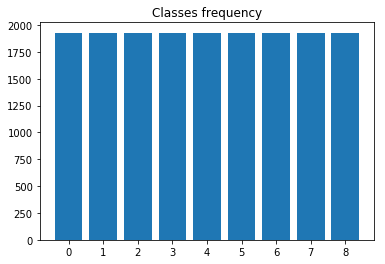

In [61]:
plt.xticks(range(9))
plt.title("Classes frequency")
plt.bar(range(9),dict(Counter(Y_undersampled)).values())

In [62]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
rus.fit(X_scaled, Y)
X_oversampled, Y_oversampled = rus.fit_resample(X, Y)

<BarContainer object of 9 artists>

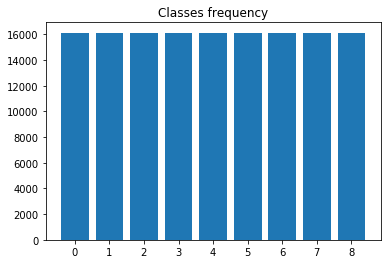

In [63]:
plt.xticks(range(9))
plt.title("Classes frequency")
plt.bar(range(9),dict(Counter(Y_oversampled)).values())

I'm planning to try both oversampled and undersampled version of the data for the models.

# Modeling

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
y_train.shape

(30939,)

### Shooting in the dark
First, I'll brute-force search through the most famous classifiers  and see which ones perform the best. Then I'm planning to pick the best 3 and try to enhance their performance

LR: 0.757199 (0.006020)
LDA: 0.700766 (0.005116)
KNN: 0.752222 (0.001559)
CART: 0.675199 (0.003016)
NB: 0.561720 (0.045236)
SVM: 0.753418 (0.004113)
RF: 0.777433 (0.003821)
ADA: 0.679143 (0.002952)
EXT: 0.780956 (0.003272)
GB: 0.761692 (0.004694)
XGB: 0.763922 (0.004403)


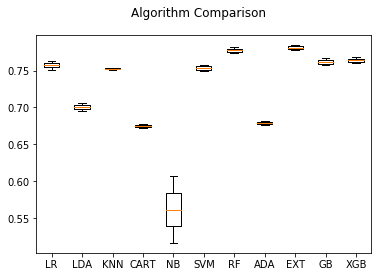

In [29]:
# Compare Algorithms

# prepare configuration for cross validation test harness
seed = 7
# prepare models
n_estimators=50
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators = n_estimators, random_state = seed)))
models.append(('ADA', AdaBoostClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('EXT', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('GB', GradientBoostingClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('XGB',XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that ExtraTreesClassifier, RandomForest, xGBoost performed the best

# Being more specific
Now that I have an idea on what models will perform better, I'll try to optimize each model required in the homework document, following this order:<br>
1.	Multi-layer Perceptron (MLP)
1.	K-Nearest Neighbours
1.	Support Vector Machines
1.	Random Forest
1.	XGBoost Methods


## MLP

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [15]:
model = MLPClassifier()
model.fit(X_train,y_train)

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
y_pred = model.predict(X_test)

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       851
           1       0.80      0.72      0.76      8927
           2       0.48      0.54      0.51      3431
           3       0.45      0.57      0.51      1056
           4       0.95      0.97      0.96      1372
           5       0.93      0.92      0.92      7187
           6       0.57      0.67      0.62      1184
           7       0.89      0.87      0.88      4363
           8       0.83      0.81      0.82      2568

   micro avg       0.77      0.77      0.77     30939
   macro avg       0.71      0.73      0.72     30939
weighted avg       0.79      0.77      0.78     30939



In [22]:
kfold = model_selection.KFold(n_splits=2, random_state=7)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
6.81/9

0.7566666666666666